# Bab I - Introduction

**Overview**
- Dataset
Proyek ini menggunakan dataset dari [Kaggle](https://www.kaggle.com/datasets/shriyashjagtap/esg-and-financial-performance-dataset/data). Data berisi tentang informasi keuangan dan kinerja ESG (_Environmental_, _Social_, dan _Governance_) pada 11.000 perusahaan dengan 9 jenis industri dan 7 wilayah sejak tahun 2015 s.d. 2025.
- Background:
`Market Capitalization` merepresentasikan nilai pasar saham dibandingkan dengan jumlah saham yang beredar. Nilai `Market Capitalization` biasanya digunakan investor untuk melihat ukuran perusahaan di pasar, yang kemudian jika dibandingkan kembali dengan kinerja keuangan, bisa menjadi dasar dalam pengambilan keputusan untuk berinvestasi atau tidak. `Market Capitalization` dapat dikategorikan menjadi 3 yaitu perusahaan dengan Large-cap atau nilai kapitalisasi di atas $10,000 juta, perusahaan dengan Med-cap atau nilai kapitalisasi di atas $3,000 juta s.d. $10,000 juta, dan Low-cap atau nilai kapitalisasi di bawah $3,000 juta. Large-cap merepresentasikan perusahaan yang sudah mapan, _well-known_, dan umumnya memberikan dividen rutin para investornya. Med-cap merepresentasikan perusahaan yang sudah cukup _established_, tapi tidak semapan atau sestabil Large-cap. Risiko berinvestasi di perusahaan Med-cappun lebih tinggi dibandingkan berinvestasi di Large-cap. Terakhir, Low-cap biasanya adalah perusahaan-perusahaan baru yang mulai merintis, skalanya mungkin masih kecil dibandingkan kedua perusahaan lain.
- Problem Statement:
Memprediksi nilai `Market Capitalization` berdasarkan fitur-fitur keuangan dan kinerja ESG dengan menggunakan algoritma terbaik di antara `KNNRegressor`, `SVR`, `DecisionTreeRegressor`, `RandomForestRegressor`, dan `HistGradientBoostingRegressor`. Metrik yang digunakan pada proyek ini adalah RMSE dan R2, yaitu karena RMSE mudah diinterpretasikan dan memberikan penalti besar pada error, serta R2 mempermudah analis untuk memahami dan mengkategorikan performa model.

# Bab II - Import Libraries

Bagian ini untuk melakukan impor libraries yang dibutuhkan pada proyek ini.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, f_oneway
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
import pickle

# Bab III - Data Loading

## 3.1 Load Dataset

Pada bagian ini, saya melakukan load data yang didapatkan dari Kaggle.

In [3]:
# load data
df = pd.read_csv("company_esg_financial_dataset.csv")
df

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3


Berdasarkan output di atas, dataset terdiri dari 11000 baris dan 16 kolom.
Dataset ini berkaitan dengan informasi kinerja 1000 perusahaan dengan berbagai jenis industri dan asal wilayah yang berbeda, dalam kurun waktu 11 tahun yaitu 2015 s.d. 2025. Secara umum, dataset berisi metrik keuangan perusahaan, seperti _revenue_ (pendapatan), _profit margin_ (margin laba), dan _market capitalization_ (nilai kapitalisasi perusahaan) serta kinerja perusahaan dalam ruang lingkup keberlanjutan (_Environmental_, _Social_, dan _Governance_).

## 3.2 Copy Dataset

In [3]:
# copy data
df_copy = df.copy()

Pada bagian ini, saya melakukan copy data sebagai upaya preventif atas risiko kehilangan data.

## 3.3 Identify Duplicate Data

In [4]:
# check data duplicate

df.duplicated().sum()

0

Pada bagian ini, saya mengecek data duplikat pada dataset. Namun, sesuai output, tidak ada data duplikat pada dataset.

## 3.4 Check Missing Value

In [5]:
# check missing value

df.isnull().sum()

CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64

Pada bagian ini, saya mengecek nilai hilang pada dataset. Jumlah nilai hilang pada dataset adalah 1000 data pada kolom `GrowthRate`. Selanjutnya, saya akan melihat gambaran data yang hilang.

In [6]:
# looking for missing values data

missingGR = df[df['GrowthRate'].isnull()]
missingGR

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
11,2,Company_2,Retail,Asia,2015,2934.8,-2.9,1803.1,NaN,59.9,61.1,48.6,69.8,226554.2,113277.1,453108.3
22,3,Company_3,Transportation,Latin America,2015,259.7,5.9,140.2,NaN,25.5,3.3,41.6,31.5,183314.5,30552.4,611048.2
33,4,Company_4,Technology,Africa,2015,5036.7,21.2,23192.4,NaN,54.2,97.6,46.2,18.9,130146.6,78087.9,260293.2
44,5,Company_5,Finance,Middle East,2015,2720.9,16.1,3884.5,NaN,43.5,71.9,19.1,39.4,37894.7,18947.3,94736.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10945,996,Company_996,Healthcare,Europe,2015,3099.7,18.2,11376.4,NaN,57.4,75.5,39.7,56.9,208168.1,208168.1,416336.3
10956,997,Company_997,Utilities,Africa,2015,537.0,15.7,716.1,NaN,61.2,44.9,82.4,56.4,380375.4,237734.6,3803753.9
10967,998,Company_998,Healthcare,Oceania,2015,1055.4,14.9,3871.5,NaN,62.2,96.3,25.1,65.3,55490.0,55490.0,110980.0
10978,999,Company_999,Finance,Asia,2015,5928.4,18.2,9585.9,NaN,52.8,95.3,25.1,38.1,63210.0,31605.0,158025.0


In [7]:
# identifying year

missingGR['Year'].value_counts()

Year
2015    1000
Name: count, dtype: int64

Berdasarkan dua output di atas, seluruh nilai hilang adalah data `GrowthRate` pada tahun 2015. Kemungkinan nilai hilang ini karena perusahaan belum melakukan pencatatan `GrowthRate` pada tahun tersebut atau belum listing ke bursa saham. Artinya nilai hilang ini bisa dikategorikan sebagai MAR.

## 3.5 Data Overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

Pada bagian ini, saya akan menjelaskan tentang gambaran isi kolom:
- `CompanyID` : ID perusahaan (bersifat unik)
- `CompanyName` : Nama perusahaan
- `Industry` : Bidang industri
- `Region` : Wilayah industri beroperasi
- `Year` : Tahun pelaporan
- `Revenue` : Pendapatan tahunan (dalam juta dolar)
- `ProfitMargin` : Margin laba bersih
- `MarketCap` : Nilai kapitalisasi pasar (dalam juta dolar)
- `GrowthRate` : YoY persentase pertumbuhan pendapatan (dalam persen)
- `ESG_Overall` : skor gabungan antara 3 skor ESG (lingkungan, sosial, dan tata kelola -- dalam skala 0-100)
- `ESG_Environmental` : skor kinerja lingkungan
- `ESG_Social` : skor kinerja sosial
- `ESG_Governance` : skor kinerja tata kelola
- `CarbonEmissions` : jumlah emisi karbon per tahun (dalam ton CO₂)
- `WaterUsage` : jumlah penggunaan air per tahun (dalam m³)
- `EnergyConsumption` : jumlah konsumsi energi per tahun (dalam MWh)

## 3.6 Change Data Type

Berdasarkan informasi di atas, kolom `Year` masih belum bertipe data _date_, sehingga harus diganti.

In [9]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CompanyID          11000 non-null  int64         
 1   CompanyName        11000 non-null  object        
 2   Industry           11000 non-null  object        
 3   Region             11000 non-null  object        
 4   Year               11000 non-null  datetime64[ns]
 5   Revenue            11000 non-null  float64       
 6   ProfitMargin       11000 non-null  float64       
 7   MarketCap          11000 non-null  float64       
 8   GrowthRate         10000 non-null  float64       
 9   ESG_Overall        11000 non-null  float64       
 10  ESG_Environmental  11000 non-null  float64       
 11  ESG_Social         11000 non-null  float64       
 12  ESG_Governance     11000 non-null  float64       
 13  CarbonEmissions    11000 non-null  float64       
 14  WaterU

Tipe data pada kolom `Year` sudah diubah menjadi _date_.

## 3.7 Data Description

Pada bagian ini, saya mencari data deskripsi dari kolom-kolom numerik, dengan mengecualikan kolom `CompanyID` dan `Year`.

In [10]:
# describe data

df.describe().drop(['CompanyID','Year'], axis=1).T

,count,mean,min,25%,50%,75%,max,std
Revenue,11000.0,4.670851e+03,35.9,938.775,1902.30,4342.625,1.808104e+05,9.969954e+03
ProfitMargin,11000.0,1.090045e+01,-20.0,5.300,10.50,16.300,5.000000e+01,8.758711e+00
MarketCap,11000.0,1.338062e+04,1.8,1098.525,3096.45,9995.500,8.652717e+05,3.992287e+04
GrowthRate,10000.0,4.830370e+00,-36.0,-1.325,4.90,11.000,3.800000e+01,9.424787e+00
ESG_Overall,11000.0,5.461527e+01,6.3,44.100,54.60,65.600,9.880000e+01,1.589394e+01
ESG_Environmental,11000.0,5.641699e+01,0.0,34.700,55.60,79.000,1.000000e+02,2.676723e+01
ESG_Social,11000.0,5.566058e+01,0.0,37.600,55.15,73.800,1.000000e+02,2.335615e+01
ESG_Governance,11000.0,5.176765e+01,0.0,30.775,52.10,73.000,1.000000e+02,2.532337e+01
CarbonEmissions,11000.0,1.271462e+06,2042.2,122852.950,292073.45,740731.125,1.741047e+08,5.067760e+06
WaterUsage,11000.0,5.600442e+05,1021.1,64884.675,203880.45,525187.975,5.223142e+07,1.565686e+06


Berdasarkan output di atas:
- Nilai minimum pada  `Revenue` adalah 35.9 dan nilai maksimumnya 180810.4. Hal ini berarti data `Revenue` memiliki persebaran dengan rentang yang cukup jauh, yang juga tergambar pada nilai standar deviasi yang tinggi yaitu 9969.95.
- `ProfitMargin` dan `GrowthRate` memiliki nilai minimum negatif. Tidak seperti `Revenue` yang merujuk pada pendapatan perusahaan, di mana nilainya akan selalu positif (pendapatan = _cash inflow_), `ProfitMargin` dan `GrowthRate` memang mungkin bernilai negatif. `ProfitMargin` negatif artinya beban lebih besar dari pendapatan dan `GrowthRate` negatif artinya tingkat pertumbuhan perusahaan justru turun.
- `ESG_Overall`, `ESG_Environmental`, `ESG_Social`, dan `ESG_Governance` memiliki nilai di kisaran 0-100. Melihat rata-ratanya yang berkisar di antara 51 s.d. 56, kebanyakan data pada 4 kolom ini tersebar di Q2.
- `CarbonEmissions` memiliki rentang data yang cukup tinggi. Hal ini mungkin terjadi karena terdapat jenis industri yang cenderung menghasilkan emisi karbon jauh lebih tinggi dibandingkan yang lain, misalnya industri energi.
- Penjelasan pada poin sebelumnya juga terjadi pada kolom `WaterUsage` dan `EnergyConsumption`.

# Bab IV - Exploratory Data Analysis (EDA)

## 4.1 What types of industries are present in the data?

Pada EDA 4.1, saya melakukan eksplorasi terkait industri apa saja yang ada pada data dan melihat distribusinya.

Text(0.5, 1.0, 'Companies Distribution per Industry')

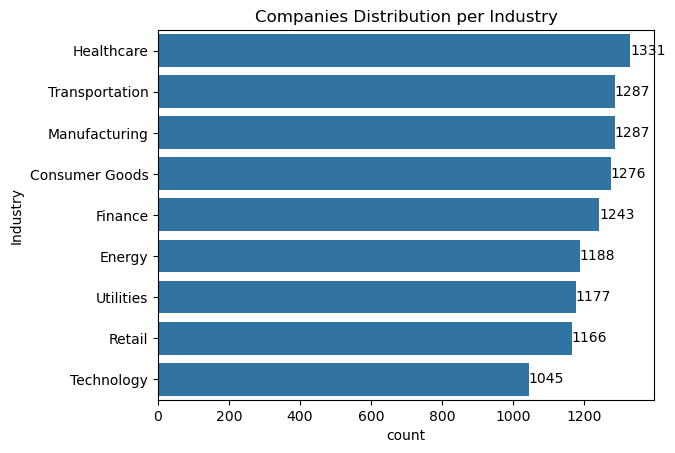

In [11]:
# types of industries

ax = sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Companies Distribution per Industry')

Berdasarkan output di atas, diketahui bahwa terdapat total 9 jenis industri pada dataset.
- Industri Kesehatan/_Healthcare_ menjadi jenis industri yang paling banyak pada dataset yaitu sejumlah 1331 dari total 11000.
- Jumlah jenis industri Manufaktur dan Transportasi memiliki total yang sama yaitu 1287.
- Terdapat perusahaan dengan industri Barang Konsumsi/_Consumer Goods_ sejumlah 1243.
- Sisanya, jumlah jenis industri Keuangan, Energi, Perlengkapan, dan Retail pada dataset masing-masing adalah 1243, 1188, 1177, dan 1166.
- Jenis industri yang paling sedikit pada dataset adalah industri Teknologi.

## 4.2 Where do these industries operate?

In [12]:
# count companies per industry and region
industry_region_counts = pd.crosstab(df['Industry'], df['Region'], margins=True, margins_name='Total')

industry_region_counts



Region,Africa,Asia,Europe,Latin America,Middle East,North America,Oceania,Total
Industry,,,,,,,,
Consumer Goods,165,209,132,176,121,209,264,1276
Energy,198,143,198,176,132,187,154,1188
Finance,165,198,198,220,187,143,132,1243
Healthcare,143,187,209,176,209,154,253,1331
Manufacturing,165,198,165,143,198,209,209,1287
Retail,154,176,176,154,198,154,154,1166
Technology,154,154,154,121,154,187,121,1045
Transportation,132,253,121,198,253,132,198,1287
Utilities,187,154,187,143,165,165,176,1177


Berdasarkan tabel di atas:
- kebanyakan industri berada di Asia, di mana jenis industri terbanyak yang ada di Asia adalah industri Transportasi.
- Industri Barang Konsumsi paling banyak berada di Oceania dengan jumlah perusahaan 264.
- Jumlah industri Energi di Afrika dan Eropa sama, yaitu sebanyak 198 perusahaan.
- Amerika Latin memiliki 220 perusahaan dengan jenis industri Keuangan, di mana jenis industri ini juga mendominasi dibandingkan jenis industri lainnya di wilayah tersebut.
- Industri Kesehatan yang merupakan jenis industri terbanyak pada dataset kebanyakan berada di wilayah Oceania.
- Industri Manufaktur kebanyakan berada di Amerika Utara dan Oceania.
- Wilayah Middle East adalah wilayah di mana paling banyak industri Retail berada.
- Industri Teknologi paling banyak berada di Amerika Utara.
- Industri Perlengkapan paling banyak berada di Eropa.

## 4.3 What is the trend of market cap from 2015 to 2025?

Text(0.5, 1.0, 'Average MarketCap Trend per Year')

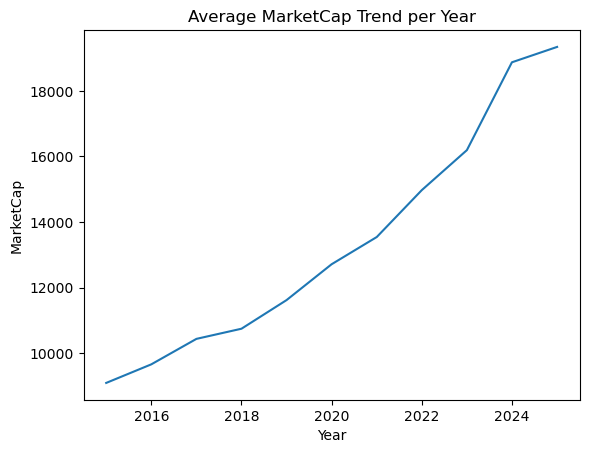

In [13]:
df_grouped = df.groupby('Year')['MarketCap'].mean().reset_index()
sns.lineplot(data=df_grouped, x='Year', y='MarketCap')
plt.title('Average MarketCap Trend per Year')

Nilai Kapitalisasi Pasar (_Market Capitalization_) pada seluruh perusahaan dan industri cenderung naik dari tahun ke tahun. Bahkan pada tahun 2020, di mana Covid-19 terjadi, trennyapun tetap naik.

## 4.4 What is the growth rate trend of each industry type from 2015 to 2025?

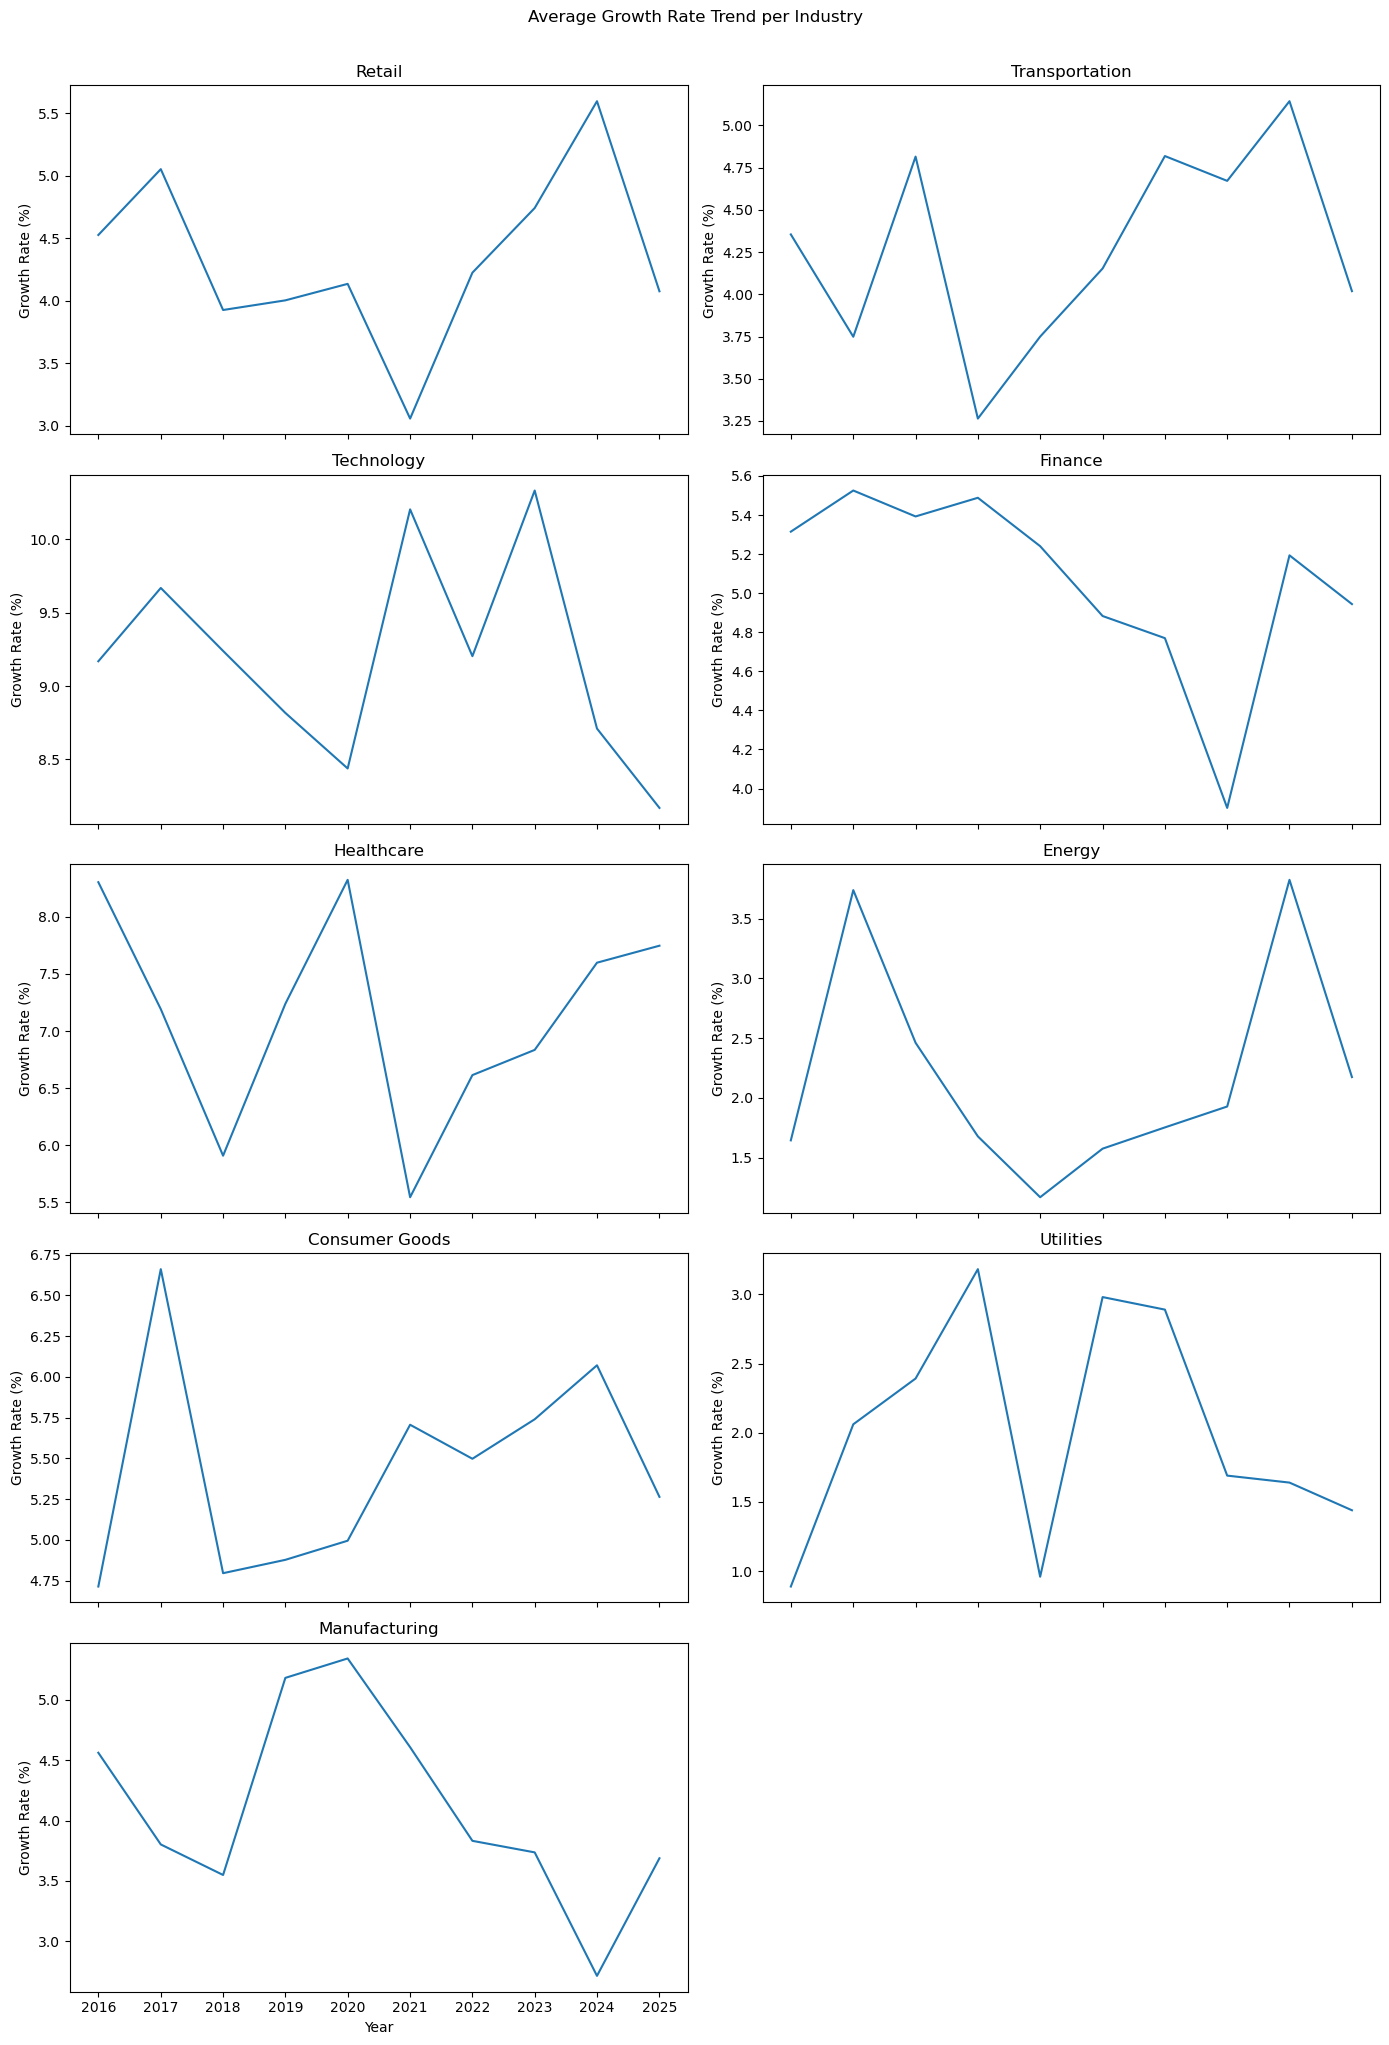

In [14]:
industries = df['Industry'].unique()
num_industries = len(industries)

# Subplot definition
rows, cols = 5, 2
fig, axes = plt.subplots(rows, cols, figsize=(14, 20), sharex=True)

# 1D iterator using flatten axes
axes = axes.flatten()

# Loop for each industry
for i, industry in enumerate(industries):
    temp = df[df['Industry'] == industry]
    temp_grouped = temp.groupby('Year')['GrowthRate'].mean().reset_index()

    sns.lineplot(data=temp_grouped, x='Year', y='GrowthRate', ax=axes[i])
    axes[i].set_title(f'{industry}')
    axes[i].set_ylabel("Growth Rate (%)")
    axes[i].set_xlabel("Year")

# Delete empty subplot (since there is just 9 plot instead of 10)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Average Growth Rate Trend per Industry', y = 1.02)
plt.show()

Berdasarkan output di atas, diketahui bahwa:
- Meski nilai _Market Capitalization_ cenderung naik dari tahun ke tahun, tetapi _Growth Rate_ pada tiap industri tidak memiliki tren yang sama.
- Pada industri Retail (plot 1,1), lonjakan tingkat pertumbuhan ada pada tahun 2024. Hal ini juga terjadi pada industri Transportasi (plot 1,2).
- Tren tingkat pertumbuhan yang berkebalikan sangat intens terlihat pada tahun 2020, di mana tingkat pertumbuhan industri Kesehatan melonjak tinggi (plot 3,1), sedangkan tingkat pertumbuhan industri Teknologi anjlok (2,1). Namun, secara rata-rata keseluruhan tingkat pertumbuhan industri Teknologi lebih tinggi daripada industri lainnya, terlihat dari plot: y-axis pada industri Teknologi maksimal di angka 10%.
- Kira-kira pada tahun 2023, tingkat pertumbuhan industri Keuangan anjlok (plot 2,2). Namun, kembali merangkak naik pada tahun 2024.
- Terlihat seasonality pada industri Energi (plot 3,2), di mana pada tahun 2017 mengalami kenaikan _Growth Rate_ dan 7 tahun kemudian naik lagi dengan nilai yang terlihat sama.
- Sama halnya dengan industri Teknologi, industri Perlengkapan juga anjlok pada tahun 2020 (plot 4,2).
- Setelah turun pada tahun 2018, industri Barang Konsumsi mulai merangkak naik sampai dengan tahun 2024, walaupun mengalami penurunan kembali pada tahun 2025 (plot 1,4).
- Pada tahun 2024, industri Manufaktur mengalami penurunan pertumbuhan (plot 1,5).


## 4.5 Which features are correlated with market cap?

Text(0.5, 1.0, 'Correlations Features with MarketCap')

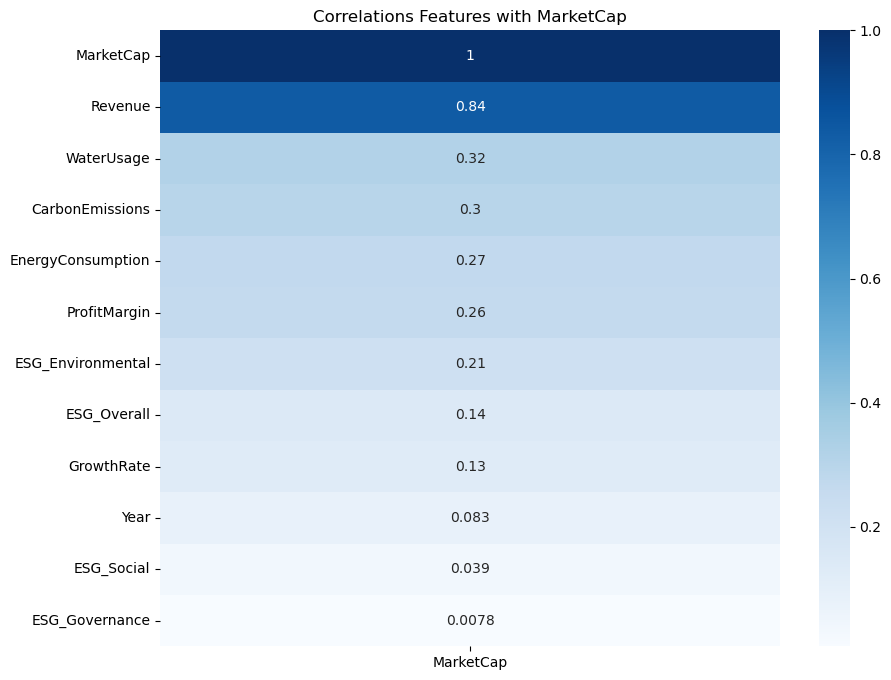

In [15]:
# correlation test with assumption: normal distribution
num_feature = ['Revenue', 'ProfitMargin', 'Year', 'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental',
               'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
corr = df[num_feature].corr()

# plot
plt.figure(figsize=(10,8))
sns.heatmap(corr[['MarketCap']].sort_values('MarketCap', ascending=False), annot=True, cmap='Blues')
plt.title('Correlations Features with MarketCap')

Berdasarkan _heatmap_ di atas, feature yang paling berpengaruh terhadap _Market Capitalization_ adalah Pendapatan. Sedangkan kinerja-kinerja perusahaan yang berhubungan dengan _sustainability_ ternyata tidak banyak berpengaruh (nilai korelasi kurang dari 50%).

## 4.6 What is the overview of ESG Overall / Carbon Emission / Water Usage across industry types?

C:\Users\Legion\AppData\Local\Temp\ipykernel_34484\2714685026.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


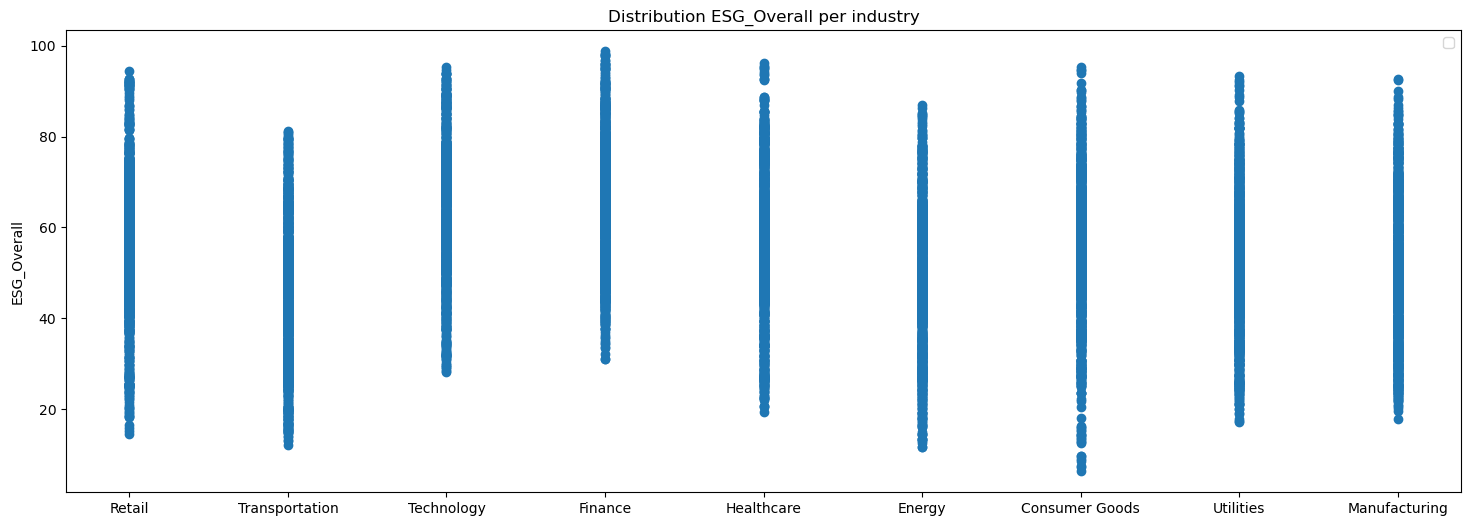

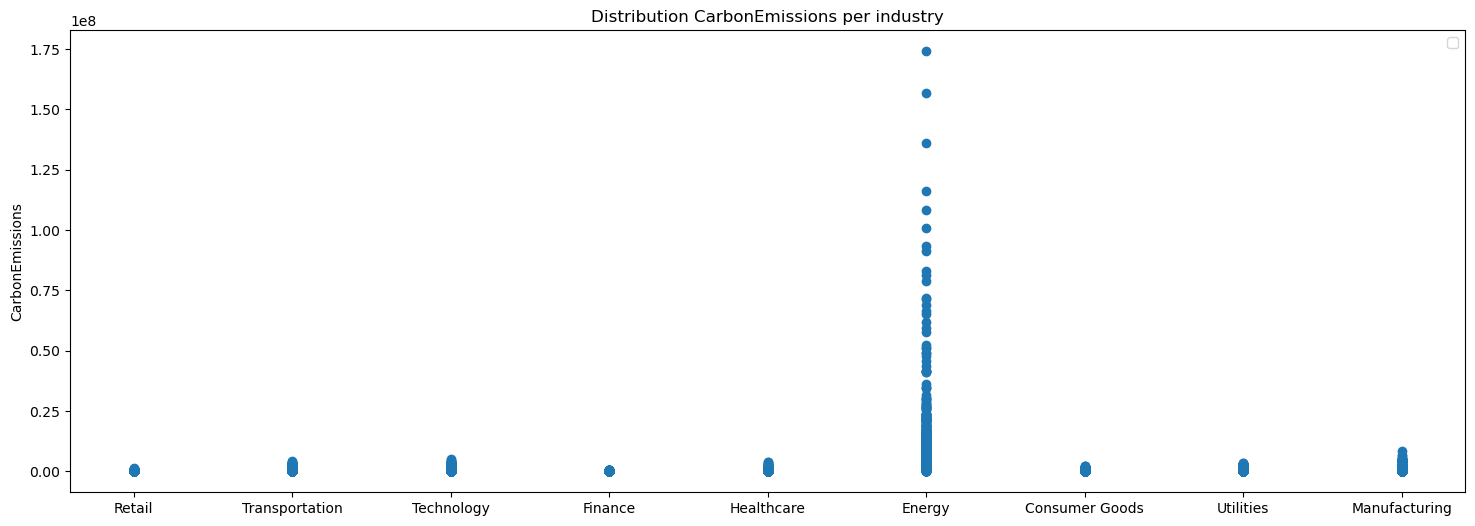

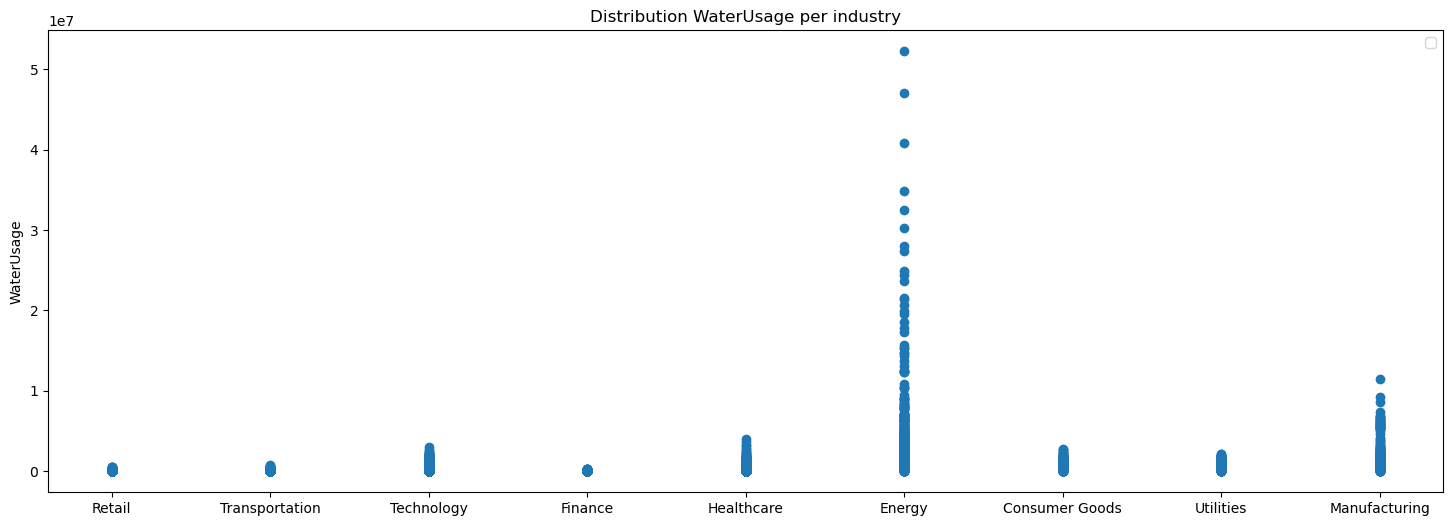

In [16]:
featureEDA46 = ['ESG_Overall', 'CarbonEmissions', 'WaterUsage']

for col in featureEDA46:

    figure = plt.figure(figsize=(18, 6))
    ax = plt.gca()
    ax.scatter(df['Industry'], df[col])
    ax.set_ylabel(col)
    ax.set_title(f"Distribution {col} per industry")

    plt.legend()
    plt.show()

- Pada industri Teknologi dan Keuangan, skor ESG cenderung lebih tinggi dibanding yang lain. Kemungkinan _stakeholder_ di kedua jenis industri ini memiliki perhatian cukup tinggi pada isu keberlanjutan.
- Sebaran skor ESG pada industri lainnya relatif sama, tersebar dari skor rendah (20 s.d. 90an).
- Industri Energi, seperti yang sudah kita ketahui, berhubungan dengan proses produksi, transformasi, transportasi, maupun distribusi dari berbagai jenis energi. Tentu saja prosesnya kebanyakan akan menghasilkan emisi karbon yang tinggi, misalnya saja industri penambangan batu bara, dalam proses produksinya bisa menghasilkan [1,5 s.d. 4,6 gigaton emisi karbon](https://pwypindonesia.org/id/urgensi-keterbukaan-data-emisi-gas-rumah-kaca-pertambangan-batubara-dalam-upaya-memerangi-krisis-iklim/). Hal ini juga tergambar pada plot di atas, di mana emisi karbon terbanyak ada pada industri Energi.
- Penggunaan air terbanyak ada pada industri Energi dan disusul dengan industri Manufaktur.

## 4.7 Is there a relationship between ESG Overall and Revenue?

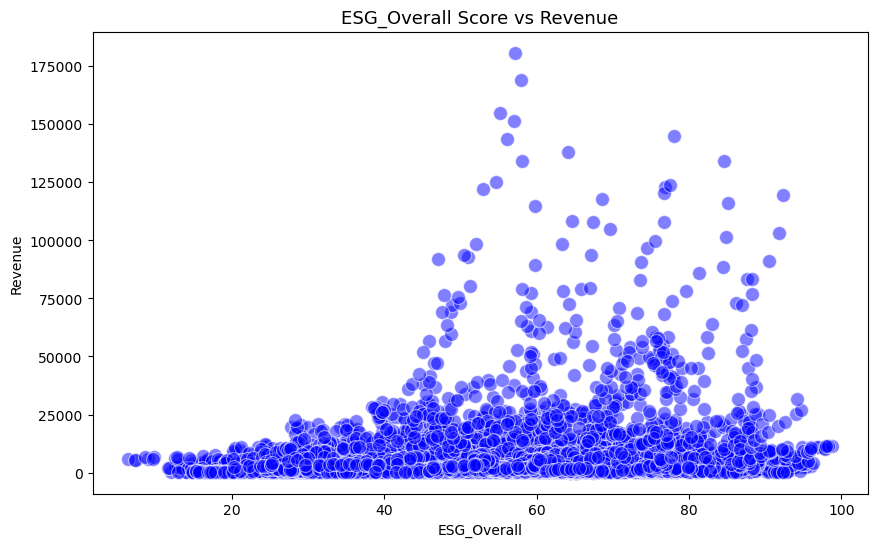

In [17]:
plt.figure(figsize=(10,6))
plt.title('ESG_Overall Score vs Revenue', fontsize=13)
sns.scatterplot(x=df['ESG_Overall'], y=df['Revenue'], color='blue',alpha=0.5, s=100)
plt.show()

Hubungan antara `ESG_Overall` dan `Revenue` tidak linear, artinya perubahan pada variabel `ESG_Overall` tidak selalu menyebabkan perubahan pada variabel `Revenue` pun sebaliknya. Misalnya saja kita bisa melihat, terdapat perusahaan yang memiliki skor `ESG_Overall` tinggi (80-100), tingkat `Revenue`nya tersebar dari rendah (di bawah 25000) sampai dengan tinggi (100,000-125,000). Bahkan `Revenue` paling tinggi justru dimiliki perusahaan dengan skor `ESG_Overall` 50an.

## 4.8 Is there a relationship between ESG Overall and Profit Margin?

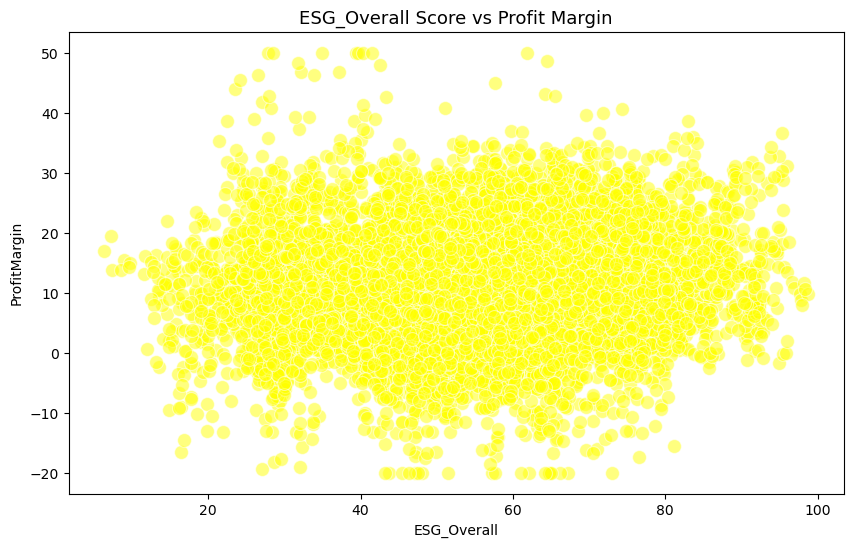

In [18]:
plt.figure(figsize=(10,6))
plt.title('ESG_Overall Score vs Profit Margin', fontsize=13)
sns.scatterplot(x=df['ESG_Overall'], y=df['ProfitMargin'], color='yellow',alpha=0.5, s=100)
plt.show()

Hubungan antara `ESG_Overall` dan `ProfitMargin` juga tidak linear, artinya perubahan pada variabel `ESG_Overall` tidak selalu menyebabkan perubahan pada variabel `ProfitMargin` pun sebaliknya.

## 4.9 What is the distribution of each variable?

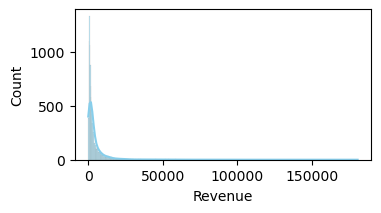

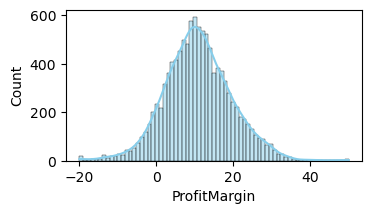

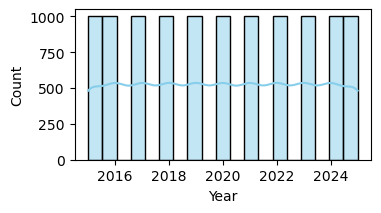

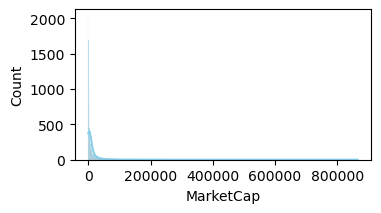

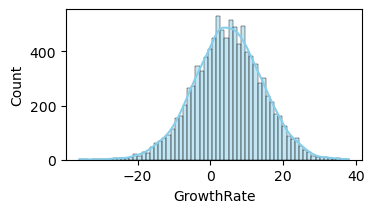

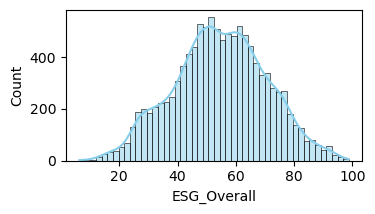

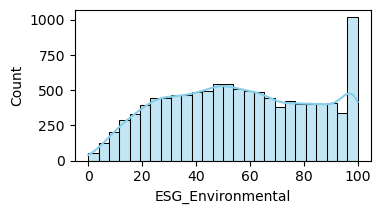

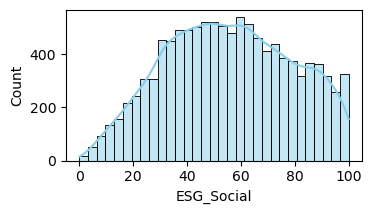

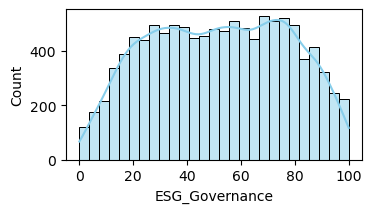

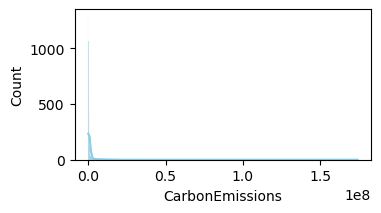

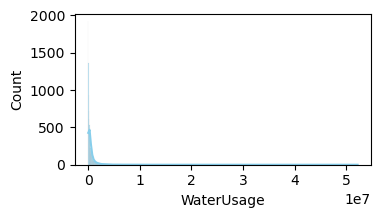

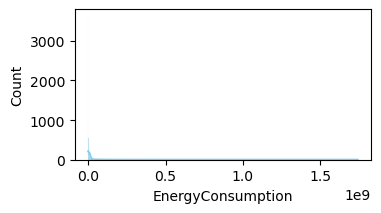

In [ ]:
for i, col in enumerate(num_feature):
    plt.figure(figsize=(13,9))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.show()

Dari seluruh gambaran distribusi, kemungkinan `GrowthRate` terdistribusi normal dengan sedikit outlier. Selain itu, kolom-kolom numerik lain terdistribusi skew ke kanan maupun ke kiri, dengan beberapa outlier. Outlier-outlier ini harus ditangani sebelum masuk ke model.

## 4.10 What is the relationship between Revenue / Profit Margin and Market Cap?

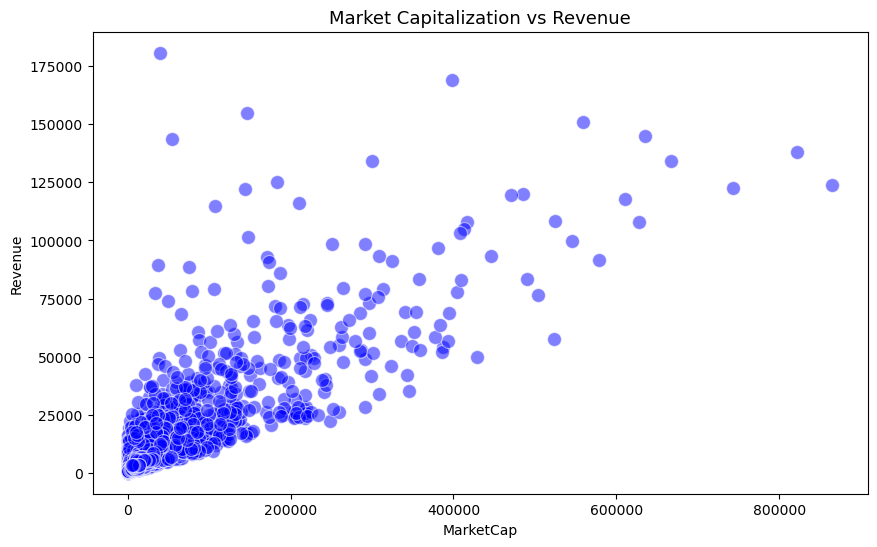

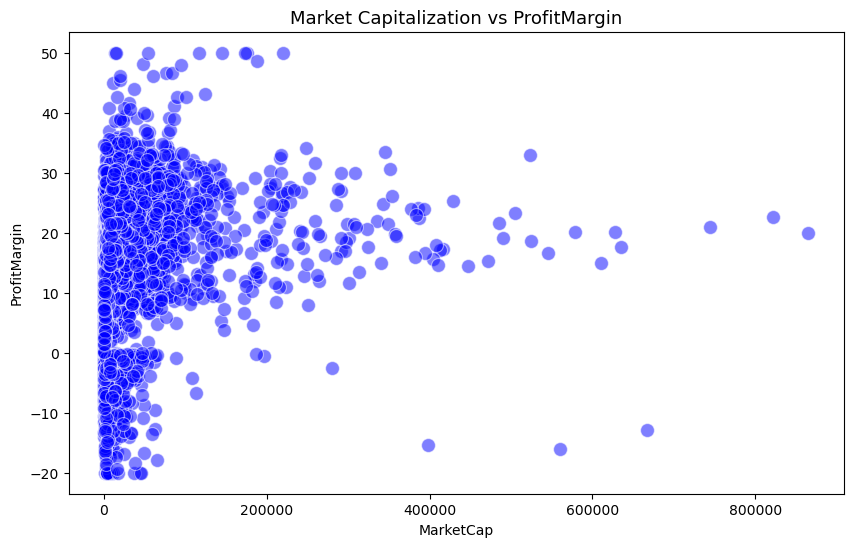

In [20]:
featureEDA410 = ['Revenue', 'ProfitMargin']

for col in featureEDA410:
    plt.figure(figsize=(10,6))
    plt.title(f'Market Capitalization vs {col}', fontsize=13)
    sns.scatterplot(x=df['MarketCap'], y=df[col], color='blue',alpha=0.5, s=100)
    plt.show()

Baik `Revenue` maupun `ProfitMargin` tidak memiliki hubungan linear dengan `MarketCap`. Meskipun begitu, korelasi antara `Revenue` dengan `MarketCap` lebih kuat dibandingan korelasi `ProfitMargin` dengan `MarketCap`. Hal ini tergambar baik pada scatter plot di atas maupun pada EDA 4.5. Pada scatter plot di atas, sebaran `Revenue` terhadap `MarketCap` mungkin bisa ditarik dengan garis lurus jika sudah dilakukan _handling outlier_.

## 4.11 Total Market Cap per Industry

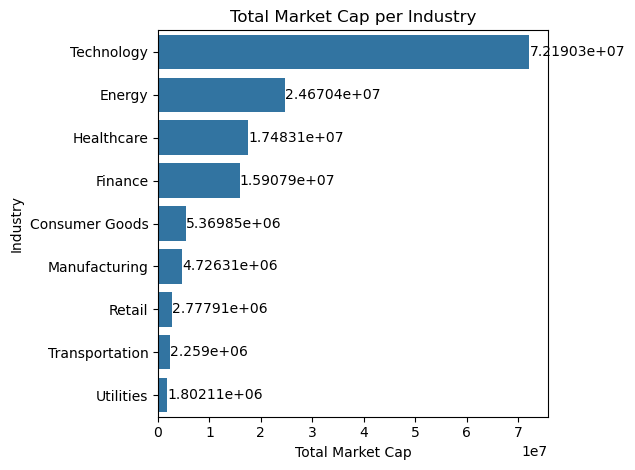

In [7]:
industry_marketcap = df.groupby('Industry')['MarketCap'].sum().sort_values(ascending=False)

# Plot
ax = sns.barplot(x=industry_marketcap.values, y=industry_marketcap.index)
ax.bar_label(ax.containers[0])
plt.title('Total Market Cap per Industry')
plt.xlabel('Total Market Cap')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

Industri teknologi memiliki `MarketCap` paling tinggi, sedangkan industri utilitas memiliki `MarketCap` paling rendah. Hal ini sesuai dengan kenyataan bahwa kebanyakan perusahaan teknologi seperti Google, Amazon, atau Facebook memang perusahaan-perusahaan besar di dunia.

## 4.12 Total MarketCap per Region

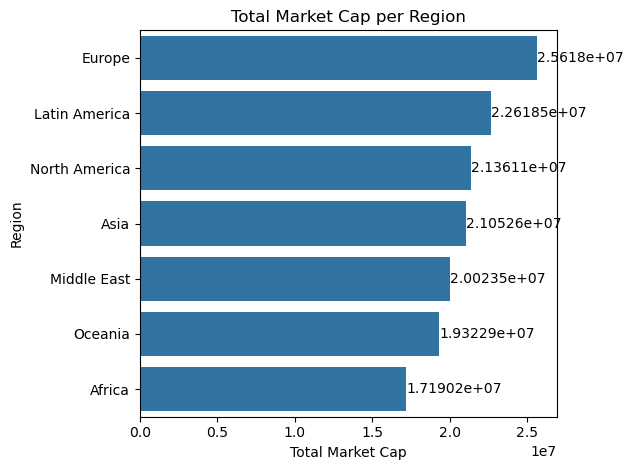

In [9]:
region_marketcap = df.groupby('Region')['MarketCap'].sum().sort_values(ascending=False)

# Plot
ax = sns.barplot(x=region_marketcap.values, y=region_marketcap.index)
ax.bar_label(ax.containers[0])
plt.title('Total Market Cap per Region')
plt.xlabel('Total Market Cap')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Bab V - Feature Engineering

## 5.1 Handling Cardinality

Pada bagian ini, saya akan melakukan pengecekan kardinalitas dari tiap kolom yang memiliki tipe data _object_.

In [21]:
pd.set_option('display.max_colwidth', None)

cat_cols = ['CompanyName', 'Industry', 'Region']

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['Column Name', 'Count of Unique Value', 'Unique Value'], data=listItem)

,Column Name,Count of Unique Value,Unique Value
0,CompanyName,1000,"[Company_1, Company_2, Company_3, Company_4, Company_5, Company_6, Company_7, Company_8, Company_9, Company_10, Company_11, Company_12, Company_13, Company_14, Company_15, Company_16, Company_17, Company_18, Company_19, Company_20, Company_21, Company_22, Company_23, Company_24, Company_25, Company_26, Company_27, Company_28, Company_29, Company_30, Company_31, Company_32, Company_33, Company_34, Company_35, Company_36, Company_37, Company_38, Company_39, Company_40, Company_41, Company_42, Company_43, Company_44, Company_45, Company_46, Company_47, Company_48, Company_49, Company_50, Company_51, Company_52, Company_53, Company_54, Company_55, Company_56, Company_57, Company_58, Company_59, Company_60, Company_61, Company_62, Company_63, Company_64, Company_65, Company_66, Company_67, Company_68, Company_69, Company_70, Company_71, Company_72, Company_73, Company_74, Company_75, Company_76, Company_77, Company_78, Company_79, Company_80, Company_81, Company_82, Company_83, Company_84, Company_85, Company_86, Company_87, Company_88, Company_89, Company_90, Company_91, Company_92, Company_93, Company_94, Company_95, Company_96, Company_97, Company_98, Company_99, Company_100, ...]"
1,Industry,9,"[Retail, Transportation, Technology, Finance, Healthcare, Energy, Consumer Goods, Utilities, Manufacturing]"
2,Region,7,"[Latin America, Asia, Africa, Middle East, Oceania, Europe, North America]"


Pada tabel di atas, diketahui bahwa `CompanyName` bersifat _high cardinality_. Selain itu, berdasarkan _personal judgment_, tidak ada hubungan antara nama perusahaan dengan nilai kapitalisasi pasar perusahaan, maka kolom ini akan dihapus sebelum masuk ke model. Selain itu, sama halnya dengan kolom `CompanyName` yang bersifat _high cardinality_, kolom `CompanyID` (kolom numerik yang bersifat unik, melekat pada tiap perusahaan) akan dihapus juga karena tidak memiliki hubungan dengan target.

## 5.2 Split Between X (Features) and y (Target)

Pada bagian ini, saya melakukan split Feature dan Target. Sesuai dengan tujuan dari proyek ini yaitu memprediksi nilai `MarketCap` perusahaan, maka Target adalah kolom `MarketCap`, sisanya seluruh kolom untuk sementara dimasukkan menjadi Feature.

In [22]:
# split X and y, add: drop columns with high cardinality
X = df.drop(columns=['MarketCap'])
y = df['MarketCap']

## 5.3 Split Between Train and Test Set

Pada bagian ini, Feature dan Target dibagi menjadi train dan test, di mana untuk pembagiannya dengan proporsi 80% Train dan 20% Test.

In [23]:
#Splitting training - validating & testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (8800, 15)
Test Size (2200, 15)


## 5.4 Handling Outlier

Pada bagian ini dilakukan pengecekan distribusi data, persentase outlier, batas atas outlier, dan batas bawah outlier.

In [24]:
skewness_target = y.skew()

if skewness_target <= 0.5 and skewness_target >= -0.5:
    print(f"Skewness MarketCap: {skewness_target} and distribution: normal.")
elif skewness_target < -1 or skewness_target > 1:
    print(f"Skewness MarketCap: {skewness_target} and distribution: highly skewed.")
else:
    print(f"Skewness MarketCap: {skewness_target} and distribution: moderately skewed.")

Skewness MarketCap: 8.884838329435931 and distribution: highly skewed.


In [25]:
num_col = ['Revenue', 'ProfitMargin', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental',
               'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
listItem = []

for col in num_col:
  listItem.append([col, round(df[col].skew(),1), np.where(
    (round(df[col].skew(),1) <= 0.5) & (round(df[col].skew(),1) >= -0.5),
    'normal',
    np.where(
    (round(df[col].skew(),1) < -1) | (round(df[col].skew(),1) > 1),
    'highly skewed',
    'moderately skewed'))])

skewness = pd.DataFrame(columns=['Column Name', 'Skewnesss', 'Distribution'], data= listItem)
skewness

,Column Name,Skewnesss,Distribution
0,Revenue,7.4,highly skewed
1,ProfitMargin,0.1,normal
2,GrowthRate,-0.1,normal
3,ESG_Overall,-0.0,normal
4,ESG_Environmental,0.0,normal
5,ESG_Social,-0.0,normal
6,ESG_Governance,-0.0,normal
7,CarbonEmissions,15.9,highly skewed
8,WaterUsage,14.4,highly skewed
9,EnergyConsumption,15.7,highly skewed


Berdasarkan dua output di atas,
- kolom `MarketCap` sebagai target ternyata terdistribusi sangat miring. Oleh karena itu, saya akan melakukan transform log pada kolom ini, khususnya pada algoritma KNN dan Boosting yang sensitif terhadap outlier. Alasan transform log pada kolom target juga karena nilai pada kolom ini tidak boleh negatif, karena [kapitalisasi pasar](https://www.investopedia.com/terms/m/marketcapitalization.asp) adalah nilai dari harga saham saat ini dikalikan jumlah saham yang beredar.
Namun, sebagai pembanding, saya juga mengaplikasikan model tanpa transform log pada kolom target.
- kolom feature lainnya kebanyakan terdistribusi normal, tetapi kolom `Revenue`, `CarbonEmissions`, `WaterUsage`, dan `WaterUsage` memiliki distribusi yang sangat miring. Namun, untuk menyamakan seluruh rentang nilai, saya akan mengaplikasikan MinMaxScaler() pada seluruh fitur numerik.

Selanjutnya, saya akan melihat persentase outlier pada seluruh feature.

In [26]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['Column Name'][row]
  #checking upper and lower boundary
  if skewness['Distribution'][row] == 'highly skewed':
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (IQR * 3)
    upper_boundary = df[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = df[col].mean() - 3* df[col].std()
    upper_boundary = df[col].mean() + 3* df[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(df[df[col] > upper_boundary]) / len(df) * 100) + (len(df[df[col] < lower_boundary]) / len(df) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Revenue,14554.18,-9272.78,5.87
1,ProfitMargin,37.18,-15.38,0.74
2,GrowthRate,33.10,-23.44,0.39
3,ESG_Overall,102.30,6.93,0.01
4,ESG_Environmental,136.72,-23.88,0.00
5,ESG_Social,125.73,-14.41,0.00
6,ESG_Governance,127.74,-24.20,0.00
7,CarbonEmissions,2594365.65,-1730781.58,8.31
8,WaterUsage,1906097.88,-1316025.22,5.60
9,EnergyConsumption,21544998.52,-15621645.68,9.37


Berdasarkan output di atas, terdapat 4 feature yang memiliki persentase outlier yang cukup tinggi (di atas 5%) yaitu `Revenue`, `CarbonEmissions`, `WaterUsage`, dan `EnergyConsumption`. Namun, menurut saya, nilai yang terlalu tinggi pada keempat kolom ini memang terjadi di dunia nyata. Terdapat perusahaan-perusahaan besar yang memiliki tingkat `Revenue` jauh lebih tinggi dibandingkan mayoritas perusahaan lainnya. Oleh karena itu, saya memutuskan untuk tetap mempertahankan outlier.

## 5.5 Feature Selection

Pada bagian ini, saya melakukan uji korelasi antara fitur dengan target yang bertujuan untuk memilih kolom yang akan digunakan pada model. Uji korelasi terbagi menjadi dua, yaitu uji antara fitur numerik dengan target numerik menggunakan  `Spearman` karena distribusi kolom target adalah miring dan uji antara fitur kategorikal nominal dengan target numerik menggunakan ANOVA one-way.

In [27]:
# correlation numeric
p_values = []
interpretasi = []
cols = []

for col in num_col:
  corr_coef, p_value = spearmanr(X_train[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('there is correlation')
  else :
    interpretasi.append('no correlation')

pd.DataFrame({'column name':cols,
              'result': interpretasi})

,column name,result
0,Revenue,there is correlation
1,ProfitMargin,there is correlation
2,GrowthRate,no correlation
3,ESG_Overall,there is correlation
4,ESG_Environmental,there is correlation
5,ESG_Social,no correlation
6,ESG_Governance,there is correlation
7,CarbonEmissions,there is correlation
8,WaterUsage,there is correlation
9,EnergyConsumption,there is correlation


Berdasarkan output di atas, untuk fitur numerik, `GrowthRate` dan `ESG_Social` tidak memiliki korelasi dengan target, sehingga kedua kolom ini akan didrop sebelum masuk ke model.

In [28]:
p_values = []
interpretasi = []
cols = []
cat_col = ['Industry', 'Region']

for col in cat_col:
    groups = [y_train[X_train[col] == category] for category in X_train[col].unique()]

    stat, p_value = f_oneway(*groups)

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
      interpretasi.append('there is correlation')
    else :
      interpretasi.append('no correlation')

pd.DataFrame({'column name':cols,
              'result': interpretasi})



,column name,result
0,Industry,there is correlation
1,Region,there is correlation


Berdasarkan output di atas, dua fitur kategorikal di atas semuanya memiliki korelasi dengan target.

## 5.6 Handling Missing Values

Berdasarkan informasi pada subbab 3.4, terdapat 1000 nilai hilang pada kolom `GrowthRate`. Namun, karena tidak ada korelasi antara target dengan `GrowthRate` sesuai dengan pembahasan pada subbab 5.5 di mana hal ini berarti kolom akan didrop sebelum masuk ke model, maka saya tidak melakukan handling terhadap missing values.

## 5.7 Preprocessing Pipeline

Pada bagian ini saya akan membuat pipeline untuk preprocessing seluruh feature.
- Kolom numerik: scaling dengan MinMaxScaler.
- Kolom kategorikal: encoding dengan OneHotEncoder.
- Gabung dengan ColumnTransformer.

Untuk kolom target, karena distribusinya sangat miring, maka akan dilakukan log transform.

In [29]:
# Define columns

num_col = ['Revenue', 'ProfitMargin', 'ESG_Overall', 'ESG_Environmental',
           'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
cat_col = ['Industry', 'Region']

Pada bagian definisi kolom, saya tidak memasukkan `CompanyID`, `CompanyName`, `GrowthRate`, `ESG_Social`, dan `Year`. `CompanyID` dan `CompanyName` bersifat unik dan sangat tinggi kardinalitas, kedua kolom tersebut juga tidak berpengaruh pada target. `GrowthRate` dan `ESG_Social` karena tidak ada korelasi dengan target. Selain itu, dalam modeling proyek ini, targetnya adalah memprediksi `MarketCap`, di mana target ini juga tidak dipengaruhi oleh kolom `Year` sehingga kolom ini juga tidak digunakan pada model (hanya untuk EDA saja).

In [30]:
# define each preprocessing process

# categorical feature pipeline
cat_pipeline = Pipeline([
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

# numerical feature pipeline
num_pipeline = Pipeline([
    ('scale', MinMaxScaler())
])

# preprocessor pipeline
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_col),
    ('num', num_pipeline, num_col)
])

# Bab VI - Model Definition

Pada bagian ini saya mendefinisikan 7 jenis model yang seluruhnya masih menggunakan _baseline parameter_ yaitu:
- model dengan algoritma KNN,
- model dengan algoritma KNN, tetapi target dilakukan transform,
- model dengan algoritma SVR,
- model dengan algoritma DecisionTree,
- model dengan algoritma RandomForest,
- model dengan algoritma HistGradientBoosting,
- model dengan algoritma HistGradientBoosting, tetapi target dilakukan transform.

In [31]:
# pipeline with KNNRegressor algorithm
pipeKNN = Pipeline([
    ('preprocessor', preprocessor),
    ('modelKNN', KNeighborsRegressor())
])

# transforming target version
modelKNN_log = TransformedTargetRegressor(
    regressor=pipeKNN,
    func=np.log1p,
    inverse_func=np.expm1
)

# pipeline with SVM algorithm
pipeSVR = Pipeline([
    ('preprocessor', preprocessor),
    ('modelSVR', SVR())
])

# pipeline with DTRegressor algorithm
pipeDT = Pipeline([
    ('preprocessor', preprocessor),
    ('modelDTR', DecisionTreeRegressor())
])

# pipeline with RFRegressor algorithm
pipeRandom = Pipeline([
    ('preprocessor', preprocessor),
    ('modelRFR', RandomForestRegressor())
])

# pipeline with boosting algorithm
pipeBoost = Pipeline([
    ('preprocessor', preprocessor),
    ('boosting', HistGradientBoostingRegressor())
])

# transforming target version
modelBoost_log = TransformedTargetRegressor(
    regressor=pipeBoost,
    func=np.log1p,
    inverse_func=np.expm1
)

# Bab VII - Model Training and Evaluation

Pada bagian ini, terdapat dua proses yang dilakukan yaitu training model dan mengevaluasi hasilnya.

Untuk keperluan evaluasi, saya menggunakan metrik RMSE (_root mean squared error_) dan R2. Alasan dari pemilihan metrik ini adalah:
- Tujuan dari proyek ini adalah prediksi nilai `MarketCap` suatu perusahaan, di mana pada akhirnya nilai `MarketCap` yang diprediksi bisa memberikan wawasan pada investor. Oleh karena itu, kesalahan atau error perlu diminimalisasi sesedikit mungkin untuk menghindari kerugian investor. RMSE akan cocok digunakan sebagai metrik untuk kasus seperti ini, karena RMSE memberikan penalti besar terhadap error. Di samping itu, RMSE merupakan metrik yang mudah dipahami dan bisa langsung dibandingkan dengan nilai `MarketCap`.
- Untuk memudahkan membedakan model mana yang memiliki performa lebih baik daripada yang lain, skor R2 dapat sangat membantu. Skor R2 yang berkisar dari 0-1 mempermudah analis untuk memahami dan mengkategorikan performa model. Namun, skor R2 juga mungkin negatif ketika performa model sangat buruk saat memprediksi test dibandingkan saat memprediksi train.

## 6.1 Evaluation by Score

In [32]:
# store all models
models = {
    'KNNRegressor' : pipeKNN,
    'KNNwithTransform' : modelKNN_log,
    'SVRegressor' : pipeSVR,
    'DecisionTree' : pipeDT,
    'RandomForest' : pipeRandom,
    'Boosting' : pipeBoost,
    'BoostwithTransform': modelBoost_log}

# Training and evaluation using RMSE and R2 metric
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    y_preds = model.predict(X_test)
    rmse_train = root_mean_squared_error(y_train, y_pred)
    r2_train = r2_score(y_train, y_pred)
    rmse_test = root_mean_squared_error(y_test, y_preds)
    r2_test = r2_score(y_test, y_preds)
    print(f"\n ✅ Model Name: {name}")
    print(f" 🧠 RMSE - Train: {rmse_train}")
    print(f" 🧠 RMSE - Test: {rmse_test}")
    print(f" 🚀 R2 Score - Train: {r2_train}")
    print(f" 🚀 R2 Score - Test: {r2_test}")



 ✅ Model Name: KNNRegressor
 🧠 RMSE - Train: 11995.602670847476
 🧠 RMSE - Test: 20138.506466436516
 🚀 R2 Score - Train: 0.9005916807786271
 🚀 R2 Score - Test: 0.8137583320295235

 ✅ Model Name: KNNwithTransform
 🧠 RMSE - Train: 13100.474247398146
 🧠 RMSE - Test: 22396.89620082305
 🚀 R2 Score - Train: 0.8814360602794851
 🚀 R2 Score - Test: 0.7696448058227534

 ✅ Model Name: SVRegressor
 🧠 RMSE - Train: 39284.71660647751
 🧠 RMSE - Test: 47901.31670474222
 🚀 R2 Score - Train: -0.06616847156368744
 🚀 R2 Score - Test: -0.05370062516591134

 ✅ Model Name: DecisionTree
 🧠 RMSE - Train: 0.0
 🧠 RMSE - Test: 24383.955309029916
 🚀 R2 Score - Train: 1.0
 🚀 R2 Score - Test: 0.7269572544576469

 ✅ Model Name: RandomForest
 🧠 RMSE - Train: 4113.111822751079
 🧠 RMSE - Test: 19737.08518807936
 🚀 R2 Score - Train: 0.988312553927319
 🚀 R2 Score - Test: 0.8211090517652346

 ✅ Model Name: Boosting
 🧠 RMSE - Train: 8218.255806028783
 🧠 RMSE - Test: 21433.14541774355
 🚀 R2 Score - Train: 0.953340734614498
 

Berdasarkan output di atas diketahui bahwa:
- Model KNN tanpa transform target memiliki performa cukup bagus, baik pada saat train maupun test di mana untuk selisih skor RMSE antara train dan test sekitar 9000an dan selisih R2 sekitar 0.09.
Namun dekimian, pada train, skor RMSE dan R2nya cenderung lebih tinggi yang berarti bisa jadi model overfit.
- Model KNN dengan transform target mengalami penurunan performa dibandingkan model KNN tanpa transform. Kecenderungan performa model juga mengakibatkan hasil yang overfit, di mana selisih skor RMSE antara train dan test sekitar 9000an dan selisih R2 sekitar 0.12.
- Model SVR memiliki skor RMSE yang cukup tinggi baik pada train dan test yaitu di atas 35000, artinya selisih prediksi dengan aktual tinggi. Performa model yang buruk diperjelas dengan skor R2 yang mendapatkan skor [negatif](http://towardsdatascience.com/negative-r2-where-did-you-go-wrong-9d4f2aa84cfb/) di mana hal ini mengindikasikan bahwa performa prediksi model pada data test sangat buruk dibandingkan performa prediksi model pada data train.
- Model DecisionTree sebagaimana kelemahan model ini yang cenderung overfit menunjukkan skor RMSE dan R2 pada train yang sempurna tanpa celah. Namun, kemudian menurun tajam pada saat test di mana skor RMSEnya 24000an dan skor R2nya 0.72. Kedua skor ini lebih buruk dibandingkan skor RMSE dan R2 model KNN.
- Model RandomForest juga memiliki skor RMSE dan R2 pada train yang jauh lebih tinggi dibandingkan pada test, meskipun skornya tidak berbeda signifikan sebagaimana model DecisionTree. Selisih skor RMSE antara train dan test adalah 15000an dan selisih R2 sekitar 0.16.
- Model HistGB tanpa transform target cenderung overfit dengan selisih skor RMSE adalah 13000an dan selisih R2 adalah 0.17.
- Model HistGB dengan transform target mengalami penurunan performa saat train dibandingkan model HistGB tanpa transform. Namun, performanya lebih baik saat test dibandingkan model HistGB tanpa transform.

Berdasarkan penjelasan di atas, dapat disimpulkan performa model yang paling baik yaiu model KNN dan model RandomForest. Namun, kita perlu memastikan kembali melalui CrossValidation.

## 6.2 Evaluation by Plot

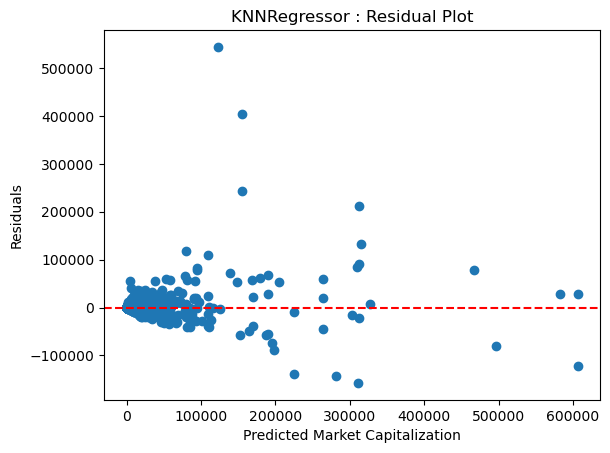

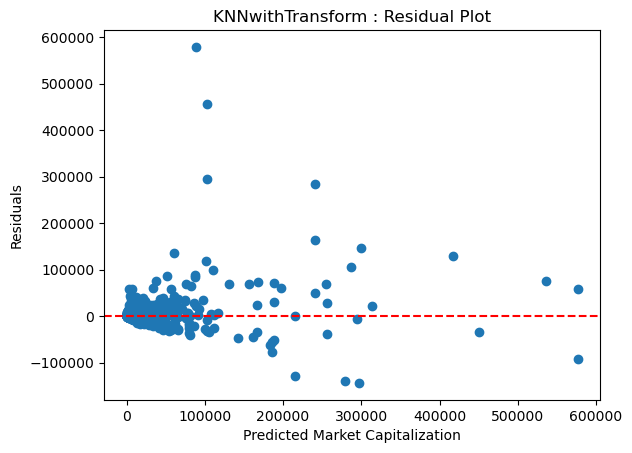

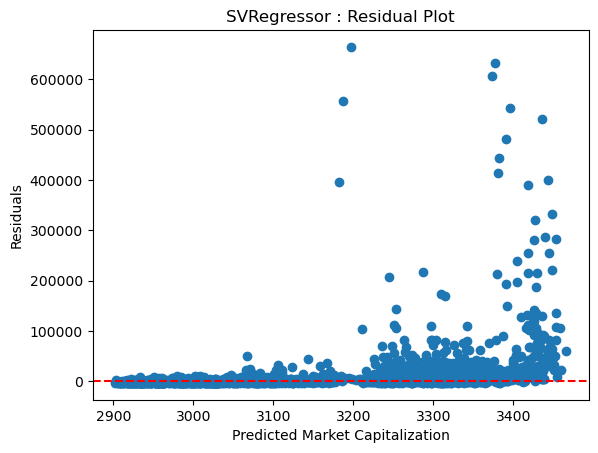

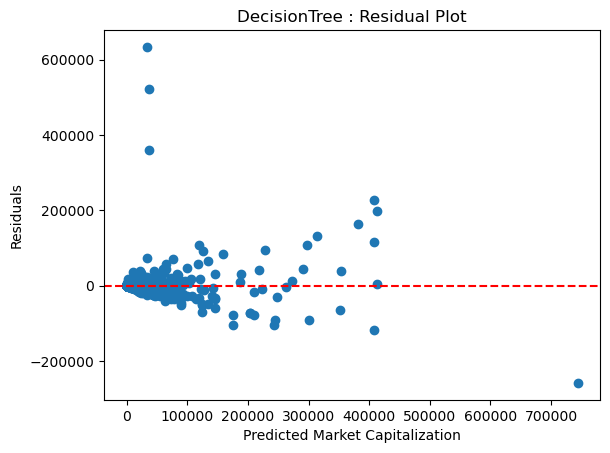

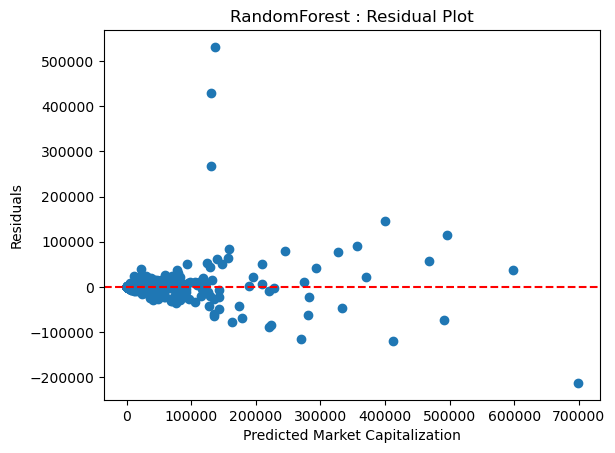

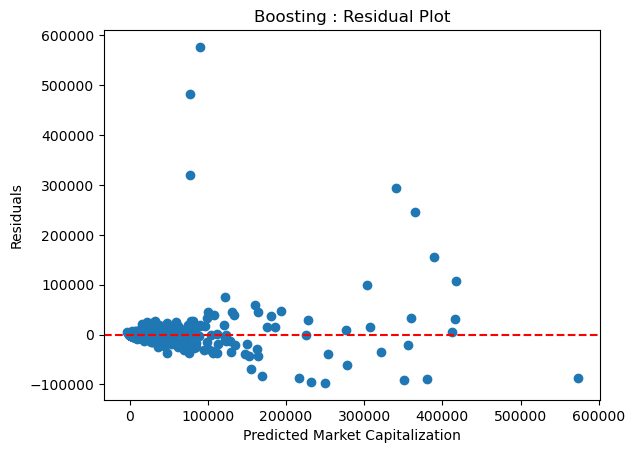

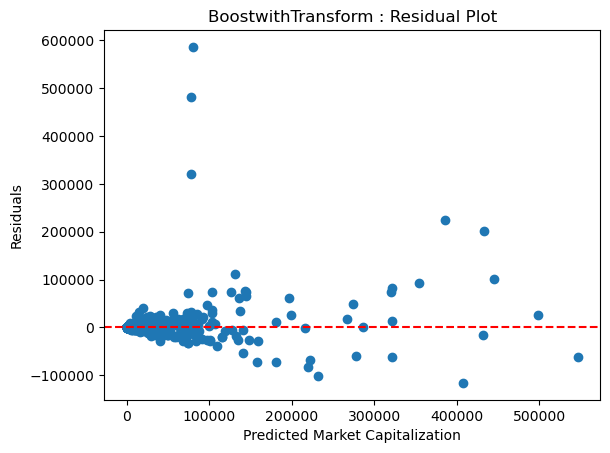

In [33]:
# Evaluation by plot
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    y_preds = model.predict(X_test)
    residuals = y_test - y_preds
    plt.scatter(y_preds, residuals)
    plt.xlabel('Predicted Market Capitalization')
    plt.ylabel('Residuals')
    plt.title(f'{name} : Residual Plot')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

Plot di atas menggambarkan residu (ytest-ypred) dibandingkan dengan ypred yang dihasilkan oleh masing-masing model. [Idealnya](https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/), residual terdistribusi secara simetris, berkumpul di sekitar angka-angka kecil (tapi tidak di bawah 0), secara umum tidak memiliki pola yang jelas.

Berdasarkan plot di atas, sumbu y pada plot KNNRegressor dan RandomForest memiliki kemiripan di mana y-positif dari 0 s.d. 500000. Seluruh plot tidak memiliki distribusi residual yang simetris. Ada kemungkinan karena pada bab ini masih menggunakan model dengan _baseline parameter_, sehingga ada kemungkinan akan lebih baik ketika menggunakan tuning.

# Bab VIII - Cross Validation

Cross Validation dilakukan untuk memutuskan model mana yang akan dipakai, berdasarkan kestabilan model. Stabilitas model dilihat dari rata-rata maupun standar deviasi ketika melakukan train dan evaluasi terhadap model, di mana jika standar deviasinya makin mendekati 0 maka model bisa dikatakan lebih stabil.

## 8.1 Cross Validation - Mean and Std

In [34]:
def getCV(model):
    # cross-validation
    crossValmodel = cross_validate(
        model,
        X_train,
        y_train,
        cv=5,
        scoring=['neg_root_mean_squared_error', 'r2']
    )

    # convert to DataFrame
    result = pd.DataFrame(crossValmodel)

    # take only 'test' columns
    testScore = result.filter(like='test_').copy()

    # make error scores positive
    error_metrics = ['test_neg_root_mean_squared_error']
    testScore[error_metrics] = testScore[error_metrics] * -1

    # rename columns
    testScore.rename(columns={
        'test_neg_root_mean_squared_error': 'RMSE',
        'test_r2': 'R2'
    }, inplace=True)

    # compute mean and std
    meanValues = testScore.mean(numeric_only=True)
    stdValues = testScore.std(numeric_only=True)

    # make a data frame
    meanValues = pd.DataFrame(meanValues).T
    stdValues = pd.DataFrame(stdValues).T
    meanValues.index = ['average']
    stdValues.index = ['std']

    # combine all
    testScore = pd.concat([testScore, meanValues, stdValues])

    return testScore.T


In [35]:
getCV(pipeKNN)

,0,1,2,3,4,average,std
RMSE,21829.014815,13269.603744,15405.845839,17849.514857,14777.449913,16626.285834,3344.385623
R2,0.643054,0.832078,0.840677,0.833194,0.849449,0.799690,0.087838


Berdasarkan output di atas, rata-rata skor RMSE di model KNN tanpa transform target bernilai 16626, nilainya lebih tinggi daripada skor RMSE yang belum melakukan CV. Standar deviasi pada kedua skor juga menunjukkan model kurang stabil dalam melakukan prediksi.

In [36]:
getCV(modelKNN_log)

,0,1,2,3,4,average,std
RMSE,22405.340070,14807.482434,16822.761591,19094.813213,15424.688887,17711.017239,3098.320833
R2,0.623957,0.790900,0.810023,0.809107,0.835973,0.773992,0.085395


Berdasarkan output di atas, tidak ada perbedaan signifikan pada skor RMSE dan R2 antara model KNN tanpa transform target dengan model KNN dengan transform target. Standar deviasinya juga memiliki nilai yang hampir sama dengan model sebelumnya.

In [37]:
getCV(pipeSVR)

,0,1,2,3,4,average,std
RMSE,37704.393022,33442.154445,39941.601065,45002.796925,39510.784847,39120.346061,4173.634909
R2,-0.064923,-0.066550,-0.070923,-0.060321,-0.076255,-0.067794,0.006062


Berdasarkan output di atas, meskipun standar deviasi skor R2 model SVR terlihat sangat kecil, tetapi perlu dilihat lagi bahwa sebenarnya skor R2 pada seluruh fold dan rata-ratanya bernilai negatif. Oleh karena itu, model ini tentu saja tidak bisa dipilih karena performanya yang buruk.

In [38]:
getCV(pipeDT)

,0,1,2,3,4,average,std
RMSE,13381.382669,13797.307751,13160.156067,14941.652904,15491.759250,14154.451728,1015.121735
R2,0.865867,0.818456,0.883740,0.883116,0.834543,0.857144,0.029434


Berdasarkan output di atas, nilai rata-rata maupun standar deviasinya memang terlihat sangat baik. Namun, perlu diingat pada evaluasi sebelumnya (sebelum Cross Validation), DecisionTree sangat overfit.

In [39]:
getCV(pipeRandom)

,0,1,2,3,4,average,std
RMSE,10963.206616,9306.299046,10622.446306,11894.182518,11670.079857,10891.242869,1024.933204
R2,0.909965,0.917406,0.924255,0.925933,0.906107,0.916733,0.008665


Berdasarkan output di atas, performa model RandomForest sangat stabil di mana standar deviasinya hanya 0.008, apalagi jika dibandingkan antara standar deviasi model ini dengan model-model lain. Namun demikian, standar deviasi dengan skor RMSE masih lebih tinggi dibandingkan model DecisionTree. Berdasarkan performa model ini dan stabilitas model berdasarkan standar deviasinya, maka saya melakukan tuning pada model RandomForest.

In [40]:
getCV(pipeBoost)

,0,1,2,3,4,average,std
RMSE,12398.976592,9824.109126,11177.907835,15628.655697,12630.445434,12332.018937,2155.396697
R2,0.884839,0.907960,0.916126,0.872120,0.890018,0.894213,0.017767


Berdasarkan output di atas, performa model HistGB tanpa transform target cukup stabil dengan standar deviasinya hanya 0.01. 

In [41]:
getCV(modelBoost_log)

,0,1,2,3,4,average,std
RMSE,12511.145054,9451.545545,10994.983179,13579.002347,10720.463149,11451.427855,1611.812191
R2,0.882746,0.914808,0.918848,0.903463,0.920766,0.908126,0.015695


Berdasarkan output di atas, performa model HistGB dengan transform target lebih baik dibandingkan yang tidak melakukan transform target. Meskipun standar deviasi pada skor R2 berkurang hanya sedikit, tetapi jika melihat standar deviasi pada skor RMSE, selisih standar deviasi antara model HistGB tanpa transform target dibandingkan model HistGB dengan transform target cukup besar (500an). Melihat bahwa model ini juga cukup baik, saya juga melakukan tuning atas model sebagai pembanding.

## 8.2 Summary

Berdasarkan penjelasan di atas, saya akan membandingkan hasil tuning antara model RandomForest dengan model HistGB dengan transform target untuk nantinya dipilih model terbaik.

# Bab IX - Hyperparameter Tuning

Menurut saya, terdapat dua model yang bisa dipertimbangkan memiliki performa yang baik untuk memprediksi target. Oleh karena itu, saya akan mengujicobakan kedua model tersebut untuk dilakukan tuning.

## 9.1 Tuning Model I - RandomForest

In [84]:
param_dist_rf = {
    'modelRFR__n_estimators': [100, 200],
    'modelRFR__max_depth': [None, 10, 20], 
    'modelRFR__min_samples_split': [2, 5, 10], 
    'modelRFR__min_samples_leaf': [1, 2, 4, 10], 
    'modelRFR__max_features': ['sqrt', 0.3, 0.5], 
    'modelRFR__bootstrap': [True],
    'modelRFR__criterion': ['squared_error']
}

# RandomizedSearchCV setup
random_search_rf = RandomizedSearchCV(
    estimator=pipeRandom,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

# Fit
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('encode',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Industry',
                                                                                'Region']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scale',
                                                                                                MinMaxScaler())]),
                                                                               ['Revenue',
                                                                                'ProfitMargin',
                                                                                'ESG_Overall',
                                                                                'ESG_Environmental',
                                                                                'ESG_Governance',
                                                                                'CarbonEmissions',
                                                                                'WaterUsa...
                                              RandomForestRegressor())]),
                   n_iter=20,
                   param_distributions={'modelRFR__bootstrap': [True],
                                        'modelRFR__criterion': ['squared_error'],
                                        'modelRFR__max_depth': [None, 10, 20],
                                        'modelRFR__max_features': ['sqrt', 0.3,
                                                                   0.5],
                                        'modelRFR__min_samples_leaf': [1, 2, 4,
                                                                       10],
                                        'modelRFR__min_samples_split': [2, 5,
                                                                        10],
                                        'modelRFR__n_estimators': [100, 200]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [85]:
random_search_rf.best_params_

{'modelRFR__n_estimators': 200,
 'modelRFR__min_samples_split': 5,
 'modelRFR__min_samples_leaf': 2,
 'modelRFR__max_features': 0.5,
 'modelRFR__max_depth': 20,
 'modelRFR__criterion': 'squared_error',
 'modelRFR__bootstrap': True}

Diketahui bahwa parameter terbaik yang dihasilkan oleh RandomizedSearch untuk model RandomForest adalah jumlah pohon 200, minimum samples split 5, minimum samples leaf 2, maximum features 0.5, kedalaman pohon 20, kriteria menggunakan squared error, dan menggunakan sampel bootstrap.

In [86]:
rf_randomcv_best = random_search_rf.best_estimator_

In [87]:
# model evaluation
y_pred_train = rf_randomcv_best.predict(X_train)
y_pred_test = rf_randomcv_best.predict(X_test)

# Check model performance
print('RMSE - Train : ', root_mean_squared_error(y_train, y_pred_train))
print('RMSE - Test  : ', root_mean_squared_error(y_test, y_pred_test))
print('R2 - Train : ', r2_score(y_train, y_pred_train))
print('R2 - Test  : ', r2_score(y_test, y_pred_test))

RMSE - Train :  6116.518559742222
RMSE - Test  :  19390.82588675301
R2 - Train :  0.9741543664648916
R2 - Test  :  0.8273307715319167


Dengan menggunakan parameter hasil tuning, didapatkan RMSE - Train lebih tinggi dibandingkan RMSE - Train sebelum tuning, tetapi RMSE - Test lebih rendah dibandingkan RMSE - Test sebelum tuning. Overfit model membaik, meskipun hanya turun sedikit. Namun, bisa disimpulkan bahwa pada proyek ini, model dengan tuning memiliki performa yang lebih baik dibandingkan dengan yang tidak di-tuning.

## 9.2 Tuning Model II - HistGradientBoosting

In [83]:
param_dist_hgb = {
    'regressor__boosting__learning_rate': [0.01, 0.05, 0.1], 
    'regressor__boosting__max_iter': [100, 200, 300],
    'regressor__boosting__max_depth': [None, 2, 5], 
    'regressor__boosting__min_samples_leaf': [20, 50],
    'regressor__boosting__max_leaf_nodes': [15, 31],
    'regressor__boosting__l2_regularization': [0, 10],
    'regressor__boosting__early_stopping': [True]
}


# RandomizedSearchCV setup
random_search_hgb = RandomizedSearchCV(
    estimator=modelBoost_log,
    param_distributions=param_dist_hgb,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

# Fit
random_search_hgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                        inverse_func=<ufunc 'expm1'>,
                                                        regressor=Pipeline(steps=[('preprocessor',
                                                                                   ColumnTransformer(transformers=[('cat',
                                                                                                                    Pipeline(steps=[('encode',
                                                                                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                                                                                    ['Industry',
                                                                                                                     'Region']),
                                                                                                                   ('num',
                                                                                                                    Pipeline(steps=[('scale',
                                                                                                                                     MinMaxScaler())]),
                                                                                                                    ['Revenue',
                                                                                                                     'ProfitM...
                   param_distributions={'regressor__boosting__early_stopping': [True],
                                        'regressor__boosting__l2_regularization': [0,
                                                                                   10],
                                        'regressor__boosting__learning_rate': [0.01,
                                                                               0.05,
                                                                               0.1],
                                        'regressor__boosting__max_depth': [None,
                                                                           2,
                                                                           5],
                                        'regressor__boosting__max_iter': [100,
                                                                          200,
                                                                          300],
                                        'regressor__boosting__max_leaf_nodes': [15,
                                                                                31],
                                        'regressor__boosting__min_samples_leaf': [20,
                                                                                  50]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [88]:
random_search_hgb.best_params_

{'regressor__boosting__min_samples_leaf': 20,
 'regressor__boosting__max_leaf_nodes': 31,
 'regressor__boosting__max_iter': 200,
 'regressor__boosting__max_depth': 5,
 'regressor__boosting__learning_rate': 0.05,
 'regressor__boosting__l2_regularization': 0,
 'regressor__boosting__early_stopping': True}

Diketahui bahwa parameter terbaik yang dihasilkan oleh RandomizedSearch untuk model HistGradientBoosting dengan transform target, tiga diantaranya menggunakan baseline parameter yaitu pada min_samples_leaf, max_leaf_nodes, dan l2_regularization.

In [89]:
hgb_randomcv_best = random_search_hgb.best_estimator_

In [90]:
# model evaluation
y_pred_train = hgb_randomcv_best.predict(X_train)
y_pred_test = hgb_randomcv_best.predict(X_test)

# Check model performance
print('RMSE - Train : ', root_mean_squared_error(y_train, y_pred_train))
print('RMSE - Test  : ', root_mean_squared_error(y_test, y_pred_test))
print('R2 - Train : ', r2_score(y_train, y_pred_train))
print('R2 - Test  : ', r2_score(y_test, y_pred_test))

RMSE - Train :  10000.802085241208
RMSE - Test  :  21332.028935287293
R2 - Train :  0.9309047405603386
R2 - Test  :  0.7910286910214672


Performa model hasil tuning tidak memberikan perubahan yang signifikan dalam memprediksi target. Kemungkinan karena RandomizedSearch mengasumsikan beberapa parameter paling baik menggunakan baseline parameter. Oleh karena itu, model ini tidak direkomendasikan untuk digunakan dalam memprediksi target.

# Bab IX - Model Saving

Pada bagian ini, saya melakukan penyimpanan atas model yang memiliki performa terbaik.

In [91]:
with open('pipeline_model.pkl', 'wb') as file:
  pickle.dump(rf_randomcv_best, file)

# Bab X - Model Inference

Bagian ini dilakukan pada notebook yang berbeda.

# Bab XI - Summary

1. Algoritma yang diujicobakan pada proyek ini memiliki kelebihan dan kelemahannya masing-masing, misalnya:
- KNN: model ini menggunakan konsep 'tetangga' yang mudah dipahami awam, komputasinya juga cukup cepat pada dataset yang kecil. Namun, kelemahannya adalah ketika datanya besar, komputasinya akan lebih berat karena iterasi model dalam memperhitungkan jarak ke semua data saat prediksi. Selain itu, kesalahan pemilihan n_neighbor juga sangat berpengaruh pada performa model.
- SVR: komputasi SVR cukup berat dibandingkan model yang lain, hal ini juga terjadi ketika model training menggunakan SVR membutuhkan waktu lama dibandingkan yang lain. Namun, SVR dapat bekerja dengan baik dengan menggunakan kernel. Hanya saja, pada proyek ini penggunaan SVR masih dengan parameter dasar saja.
- DecisionTree: kecenderungan model ini adalah overfitting, hal ini terlihat jelas pada proyek ini. Pada model evaluasi, model memprediksi dengan sempurna saat train, tetapi pada test sangat buruk dibandingkan model yang lain. Namun, kelebihan DecisionTree adalah modelnya mudah dipahami dan divisualisasikan dan waktu training cukup cepat.
- RandomForest: meskipun konsepnya mirip dengan DecisionTree, tetapi RandomForest lebih tahan terhadap overfitting. Meskipun pada proyek ini, meskipun dilakukan tuning, model ini masih agak overfitting. Kelemahannya adalah bisa menjadi sangat lambat ketika n_estimator atau jumlah pohonnya ditentukan sangat besar.
- HistGradientBoosting: kelebihannya adalah akurasinya yang cukup tinggi, stabilitasnya juga tinggi, bisa dilihat saat proses Cross Validation. Namun, kekurangannya adalah jika parameter tidak diatur dengan baik bisa menghasilkan overfitting. Hal ini ditunjukkan juga saat tuning, meskipun parameternya sudah ditentukan oleh RandomSearch, tetapi model masih sangat overfitting.

2. Tranform log pada target selain dengan alasan agar target tidak bisa bernilai negatif, sebenarnya ditujukan untuk membuat performa model lebih baik karena rentang nilainya jadi lebih sempit. Namun, pada proyek ini, transform log tidak memberikan perbedaan performa yang signifikan.

3. Kecenderungan overfit hampir pada semua model mungkin diakibatkan oleh data, proses _feature engineering_, pemilihan model, maupun parameter yang ditentukan terhadp model.
- Pada feature engineering misalnya penanganan outlier mungkin bisa dikenakan _capping_ atau penanganan lain yang lebih robust. Namun demikian, proses transform log pada feature sudah dilakukan sebelumnya dan tidak memberikan perubahan signifikan pada hasil yang overfit.
- Pada pemilihan model misalnya mungkin bisa dipertimbangkan untuk menggunakan model lain, seperti RidgeRegression, LassoRegression, maupun ElasticNet yang bisa menekan overfit.
- Pada penentuan parameter, meskipun saya telah menggunakan tuning. Namun, tuning yang dilakukan adalah RandomizedSearch yang hanya memilih secara random dan tidak mengecek secara keseluruhan parameter. Terdapat kemungkinan parameter yang tidak diujicobakan menghasilkan performa model yang lebih baik.

4. Berdasarkan hasil eksplorasi, diketahui bahwa:
- MarketCap memiliki tren naik tiap tahunnya.
- Eropa adalah wilayah dengan MarketCap paling tinggi, sedangkan perusahaan Teknologi adalah perusahaan dengan jenis industri yang memiliki MarketCap paling tinggi.
- Sebaran data seluruh fitur kebanyakan miring ke kanan, di mana banyak nilai-nilai kecil, tetapi terdapat sebaran nilai-nilai besar dengan kuantitas yang sedikit.
- Pada proyek ini, kebanyakan industri adalah industri Kesehatan.


5. Dengan menggunakan parameter hasil tuning, didapatkan RMSE - Train setelah tuning lebih tinggi dibandingkan RMSE - Train sebelum tuning (selisih 1 poin), tetapi RMSE - Test lebih rendah dibandingkan RMSE - Test sebelum tuning (selisih 0.06). Overfit model membaik, meskipun hanya turun sedikit. Namun, bisa disimpulkan bahwa pada proyek ini, model dengan tuning memiliki performa yang lebih baik dibandingkan dengan yang tidak di-tuning.

6. Proyek ini menggunakan model dengan algoritma RandomForest, meskipun hasilnya masih agak overfitting. Namun, dengan mempertimbangkan stabilitas model saat Cross Validation, model ini lebih bisa dipertimbangkan untuk digunakan dibandingkan yang lain. Pemilihan RandomForest sebagai model terbaik di proyek ini juga untuk mengakomodir tujuan dari proyek yaitu memprediksi `MarketCap` di mana nilai tersebut bisa menjadi pertimbangan investor saat memutuskan berinvestasi. Model yang terlihat memiliki performa baik (RMSE dan R2nya rendah, seperti KNN), tetapi tidak stabil bisa mengakibatkan kerugian pada user yang menggunakan model prediksi ini.